In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import cycle
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from scipy.stats.kde import gaussian_kde  # ,multivariate_normal
from scipy.stats import norm
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN,Birch,KMeans,estimate_bandwidth,MeanShift

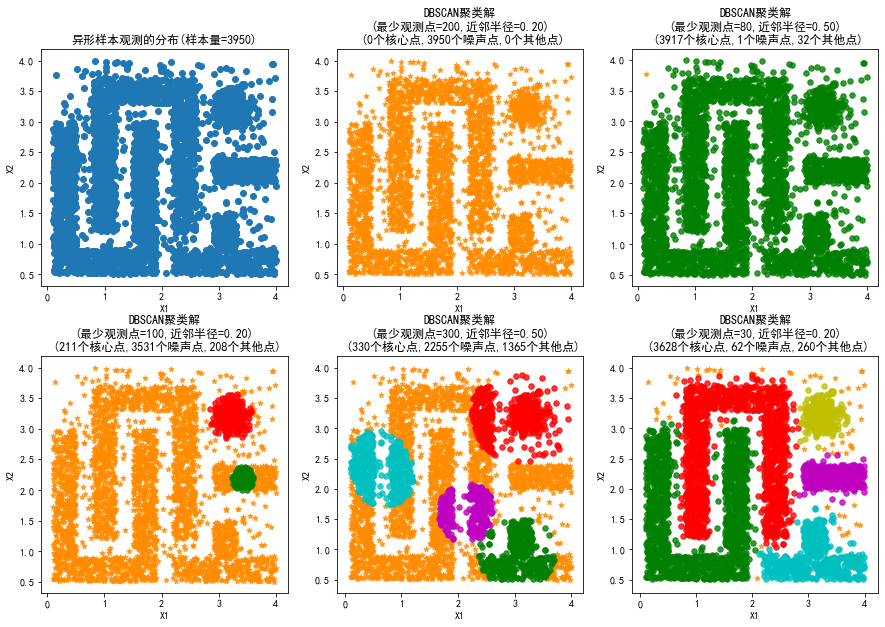

In [2]:
X=pd.read_csv('异形聚类数据.txt',header=0)
fig=plt.figure(figsize=(15,10))
plt.subplot(231)
plt.scatter(X['x1'],X['x2'])
plt.title("异形样本观测的分布(样本量=%d)"%len(X))
plt.xlabel("X1")
plt.ylabel("X2")

colors = 'bgrcmyk'
EPS=[0.2,0.5,0.2,0.5,0.2]
MinS=[200,80,100,300,30]
Gid=1
for eps,mins in zip(EPS,MinS):
    DBS=DBSCAN(min_samples=mins,eps=eps)
    DBS.fit(X)
    labels=np.unique(DBS.labels_)
    Gid+=1
    plt.subplot(2,3,Gid)
    for i,k in enumerate(labels):
        if k==-1:  #噪声点
            c='darkorange'
            m='*'
        else:
            c=colors[i]
            m='o'
        plt.scatter(X.iloc[DBS.labels_==k,0],X.iloc[DBS.labels_==k,1],c=c,s=30,alpha=0.8,marker=m)
    
    plt.title("DBSCAN聚类解\n(最少观测点=%d,近邻半径=%.2f)\n (%d个核心点,%d个噪声点,%d个其他点)"%(mins,eps,len(DBS.components_),
                                                        sum(DBS.labels_==-1),len(X)-len(DBS.components_)-sum(DBS.labels_==-1)))
    plt.xlabel("X1")
    plt.ylabel("X2")
fig.subplots_adjust(hspace=0.3)
fig.subplots_adjust(wspace=0.2)

代码说明：
（1）第1行：读入异形聚类数据。
（2）第4至7行：绘制异形聚类数据的散点图
（3）第10行：指定DBSCAN聚类参数：邻域半径e的若干取值。
（4）第11行：指定DBSCAN聚类参数：邻域半径e范围内包含的最少观测点个数的若干取值。
（5）第13至29行：利用for循环进行5种不同参数下的DBSCAN聚类：e=0.2,minPts=200;e=0.5,minPts=80;e=0.2,minPts=100;e=0.5,minPts=300;e=0.2,minPts=30。